# An exploration of internal ribosome entry sites (IRES) in single-stranded RNA (ssRNA) viruses

### Sarah Johnson and Nicholas Forino - BIOL 419

Our investigations will focus on understanding how IRESs are distributed across virus families, identifying which virus genomes are the most IRES-rich, contain the most "potent" IRESs.

In [1]:
# preliminaries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

% matplotlib inline

In [2]:
# loading the data

# this is the table that contains IRES activity for the ssRNA coding sequences (CDS) by oligo index
data = pd.read_excel('aad4939_Table_S8.xlsx', skip_footer = 277, skiprows = np.arange(1, 378), header = 0)

print('Our data has shape:', data.shape)

Our data has shape: (6112, 9)


In [3]:
# here's the first 5 rows of the data table
data.head(5)

,Oligo_Index,Accession,Virus_name,Virus_class,ORF_start,ORF_end,Oligo_start_position,eGFP_expression (a.u),Oligo_sequence
0,29583,NC_001430,Enterovirus_D,"ssRNApositive_strandviruses,noDNAstage;Picorna...",727,7311,1,206.29,CTAGGGCGCGCCAGTCCTGGTGTTTCGCTCTGGGGTTGTTCCCACC...
1,13793,NC_001430,Enterovirus_D,"ssRNApositive_strandviruses,noDNAstage;Picorna...",727,7311,175,1838.30,CTAGGGCGCGCCAGTCCTTCTGTTTCCCCGGTGAAGTTGCATAGAC...
2,13794,NC_001430,Enterovirus_D,"ssRNApositive_strandviruses,noDNAstage;Picorna...",727,7311,349,206.29,CTAGGGCGCGCCAGTCCTGACGTGGTCCAGGCTGCGTTGGCGGCCT...
3,29737,NC_001430,Enterovirus_D,"ssRNApositive_strandviruses,noDNAstage;Picorna...",727,7311,523,206.29,CTAGGGCGCGCCAGTCCTCGCAGAATGTGGCGGAACCGACTACTTT...
4,13795,NC_001430,Enterovirus_D,"ssRNApositive_strandviruses,noDNAstage;Picorna...",727,7311,697,206.29,CTAGGGCGCGCCAGTCCTCTTTCTCTTGAATAATTGAGACAACTCA...


In [4]:
############ start of sarah's work ##############

In [5]:
viruses = np.unique(data.ix[:, 1])
viruses


array(['NC_001430', 'NC_001461', 'NC_001472', 'NC_001474', 'NC_001475',
       'NC_001477', 'NC_001490', 'NC_001563', 'NC_001564', 'NC_001612',
       'NC_001617', 'NC_001655', 'NC_001672', 'NC_001710', 'NC_001809',
       'NC_001837', 'NC_001859', 'NC_001897', 'NC_001918', 'NC_002031',
       'NC_002032', 'NC_002058', 'NC_002554', 'NC_002640', 'NC_002657',
       'NC_003077', 'NC_003635', 'NC_003675', 'NC_003676', 'NC_003678',
       'NC_003679', 'NC_003687', 'NC_003690', 'NC_003976', 'NC_003983',
       'NC_003985', 'NC_003987', 'NC_003988', 'NC_003990', 'NC_003992',
       'NC_003996', 'NC_004004', 'NC_004119', 'NC_004355', 'NC_004421',
       'NC_004441', 'NC_004451', 'NC_004915', 'NC_005039', 'NC_005062',
       'NC_006553', 'NC_006947', 'NC_007580', 'NC_008250', 'NC_008718',
       'NC_008719', 'NC_009026', 'NC_009028', 'NC_009029', 'NC_009448',
       'NC_009750', 'NC_009823', 'NC_009824', 'NC_009825', 'NC_009826',
       'NC_009827', 'NC_009887', 'NC_009891', 'NC_009996', 'NC_0

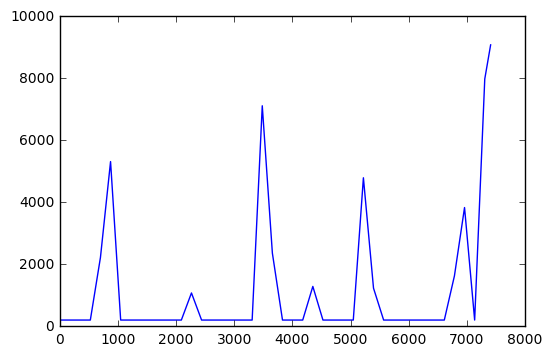

In [6]:
swine = data[data['Accession '].str.contains('NC_018668')]
swine = swine.fillna(206.29)
plt.plot(swine.loc[:, 'Oligo_start_position'], swine.loc[:, 'eGFP_expression (a.u)'])

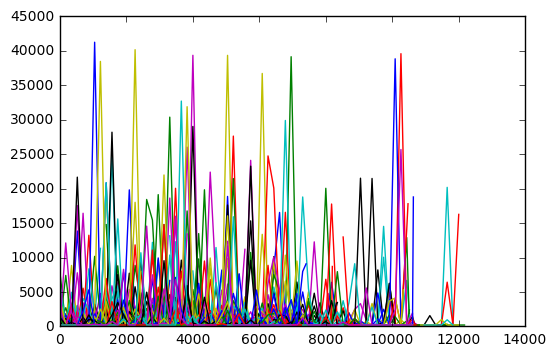

In [7]:
for i in viruses:
    expression = data[data['Accession '].str.contains(i)]
    
    plt.plot(expression.loc[:, 'Oligo_start_position'], expression.loc[:, 'eGFP_expression (a.u)'])

In [8]:
swine = data[data['Accession '].str.contains('NC_018668')]
swine = swine.fillna(206.29)
swine.head(5)

,Oligo_Index,Accession,Virus_name,Virus_class,ORF_start,ORF_end,Oligo_start_position,eGFP_expression (a.u),Oligo_sequence
5809,25392,NC_018668,Bovine_hungarovirus,"ssRNApositive_strandviruses,noDNAstage;Picorna...",733,7464,1,206.29,CTAGGGCGCGCCAGTCCTTCGCCCCTCCTTTCCCCCCTTATTTTCC...
5810,25393,NC_018668,Bovine_hungarovirus,"ssRNApositive_strandviruses,noDNAstage;Picorna...",733,7464,175,206.29,CTAGGGCGCGCCAGTCCTGCCGCTTGGAATAAGATAGGAGGAAAAG...
5811,25394,NC_018668,Bovine_hungarovirus,"ssRNApositive_strandviruses,noDNAstage;Picorna...",733,7464,349,206.29,CTAGGGCGCGCCAGTCCTGGAATTGAGTGTCTGGTACACTCTGTGT...
5812,25395,NC_018668,Bovine_hungarovirus,"ssRNApositive_strandviruses,noDNAstage;Picorna...",733,7464,523,206.29,CTAGGGCGCGCCAGTCCTATTGCCAAGCAGTCCGTACTGGTATCTT...
5813,25396,NC_018668,Bovine_hungarovirus,"ssRNApositive_strandviruses,noDNAstage;Picorna...",733,7464,697,2224.40,CTAGGGCGCGCCAGTCCTGGGACTAGGTTTTCCTTTTATTTAGATT...


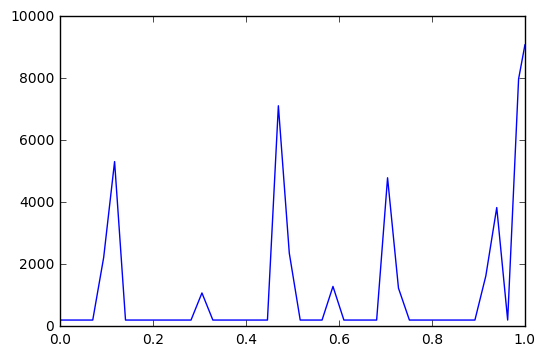

In [9]:
# test with one virus
swine = data[data['Accession '].str.contains('NC_018668')]
swine = swine.fillna(206.29)
swine_position = np.zeros(swine.shape[0])
swine.shape[0]
swine_array = swine.values
for j in np.arange(swine.shape[0]):
   swine_position[j] = swine_array[j, 6]/swine_array[-1, 6]
swine_position
plt.plot(swine_position, swine.loc[:, 'eGFP_expression (a.u)'])


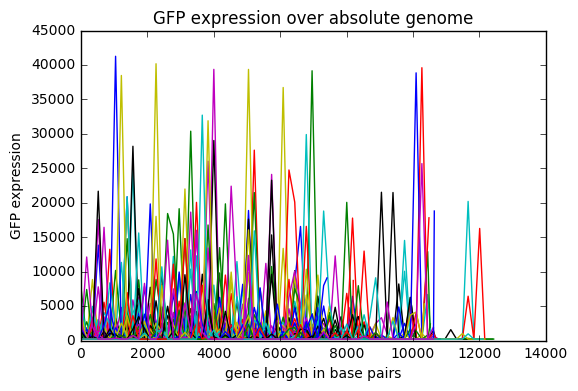

In [10]:
# plot expression levels across the total length of the genome
viruses = np.unique(data.ix[:, 1])

for i in viruses:
    expression = data[data['Accession '].str.contains(i)]
    expression = expression.fillna(206.29)  
    plt.plot(expression.loc[:, 'Oligo_start_position'], expression.loc[:, 'eGFP_expression (a.u)'])
    plt.title('GFP expression over absolute genome')
    plt.ylabel('GFP expression')
    plt.xlabel('gene length in base pairs')

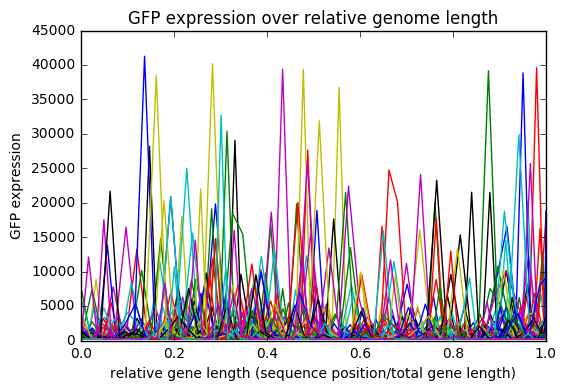

In [11]:
# plot relative expression levels across the length of the genome

for i in viruses:
    expression = data[data['Accession '].str.contains(i)]
    expression = expression.fillna(206.29)  
    position = np.zeros(expression.shape[0])
    expression_array = expression.values
    
    for j in np.arange(expression.shape[0]):
        position[j] = expression_array[j, 6]/expression_array[-1, 6]
        
    plt.plot(position, expression.loc[:, 'eGFP_expression (a.u)'])
    plt.title('GFP expression over relative genome length')
    plt.ylabel('GFP expression')
    plt.xlabel('relative gene length (sequence position/total gene length)')


In [12]:
data_acc_index = pd.read_excel('aad4939_Table_S8.xlsx', skip_footer = 277, 
                               skiprows = np.arange(1, 378), header = 0, index_col = 1)
data_acc_index

data_acc_index.ix['NC_001430'].head(5)

,Oligo_Index,Virus_name,Virus_class,ORF_start,ORF_end,Oligo_start_position,eGFP_expression (a.u),Oligo_sequence
Accession,,,,,,,,
NC_001430,29583,Enterovirus_D,"ssRNApositive_strandviruses,noDNAstage;Picorna...",727,7311,1,206.29,CTAGGGCGCGCCAGTCCTGGTGTTTCGCTCTGGGGTTGTTCCCACC...
NC_001430,13793,Enterovirus_D,"ssRNApositive_strandviruses,noDNAstage;Picorna...",727,7311,175,1838.30,CTAGGGCGCGCCAGTCCTTCTGTTTCCCCGGTGAAGTTGCATAGAC...
NC_001430,13794,Enterovirus_D,"ssRNApositive_strandviruses,noDNAstage;Picorna...",727,7311,349,206.29,CTAGGGCGCGCCAGTCCTGACGTGGTCCAGGCTGCGTTGGCGGCCT...
NC_001430,29737,Enterovirus_D,"ssRNApositive_strandviruses,noDNAstage;Picorna...",727,7311,523,206.29,CTAGGGCGCGCCAGTCCTCGCAGAATGTGGCGGAACCGACTACTTT...
NC_001430,13795,Enterovirus_D,"ssRNApositive_strandviruses,noDNAstage;Picorna...",727,7311,697,206.29,CTAGGGCGCGCCAGTCCTCTTTCTCTTGAATAATTGAGACAACTCA...


In [13]:
# create an array of the virus class for each accession number

virus_class = np.zeros(viruses.size)
for index in range(viruses.size): 
    expression = data[data['Accession '].str.contains(viruses[index])]
    if 'Picorna' in expression.iloc[0]['Virus_class']:
        virus_class[index] = 1
    elif 'Flavi' in expression.iloc[0]['Virus_class']:
        virus_class[index] = 2
virus_class

## 1 = picornavirus, 2 = flavivirus

array([ 1.,  2.,  1.,  2.,  2.,  2.,  1.,  2.,  2.,  1.,  1.,  2.,  2.,
        2.,  2.,  2.,  1.,  1.,  1.,  2.,  2.,  1.,  1.,  2.,  2.,  1.,
        2.,  2.,  2.,  2.,  2.,  2.,  2.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  2.,  1.,  2.,  2.,  1.,  1.,  1.,  1.,  2.,  2.,  1.,  2.,
        2.,  1.,  2.,  2.,  2.,  2.,  2.,  1.,  1.,  2.,  2.,  2.,  2.,
        2.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  2.,  2.,  2.,  2.,  1.,  1.,  1.,  1.,  2.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  2.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  2.,  2.,  2.,  1.,  1.,  1.,  2.,  2.,  2.,  2.])

In [14]:
## find maximum expression for each IRES

max_expression = np.zeros(viruses.size)
max_expression_location = np.zeros(viruses.size)
for index in range(viruses.size):
    expression = data[data['Accession '].str.contains(viruses[index])]

    max_expression[index] = np.max(expression['eGFP_expression (a.u)'])
max_expression

array([ 19825.  ,   2634.9 ,   8064.3 ,  10046.  ,   3891.1 ,   1578.  ,
        15328.  ,   6844.1 ,  30383.  ,  13240.  ,  11459.  ,  39359.  ,
        36724.  ,   9812.7 ,   3088.5 ,  19836.  ,   1403.7 ,  12290.  ,
        18636.  ,   9859.  ,  29030.  ,   3872.  ,  39154.  ,  39596.  ,
        20191.  ,   4608.3 ,  18017.  ,   8205.7 ,  18872.  ,   7510.1 ,
        16266.  ,  14525.  ,   2478.5 ,   4053.5 ,   4865.7 ,   8159.7 ,
         8805.3 ,    516.58,  24998.  ,   4059.1 ,   1971.5 ,   1951.3 ,
         6258.3 ,  20053.  ,   8867.5 ,   2048.3 ,  12278.  ,  40172.  ,
        21480.  ,  38850.  ,  14779.  ,  17808.  ,   3686.6 ,   7789.8 ,
         5316.4 ,  28195.  ,   3210.2 ,   5367.9 ,  27632.  ,  13155.  ,
         6123.6 ,   3078.8 ,  17618.  ,  13851.  ,  21470.  ,  24753.  ,
        15609.  ,   2328.9 ,  16051.  ,   3569.7 ,  20843.  ,  13478.  ,
        10325.  ,  12210.  ,  16431.  ,  20323.  ,   3569.7 ,   5004.6 ,
        18431.  ,  11840.  ,   8365.8 ,  25679.  , 

In [15]:
# unsuccesful attempt to find index/relative genome location of max expression

max_expression = np.zeros(viruses.size)
max_expression_location = np.zeros(viruses.size)
for index in range(viruses.size):
    expression = data[data['Accession '].str.contains(viruses[index])]
      
    expression_array = expression.values
    for np.max(expression_array[:, 7]) in expression_array[:, 7]:
        
        max_expression_location[index] = np.max(expression_array[:, 7])
max_expression

SyntaxError: can't assign to function call (<ipython-input-15-639604a42764>, line 9)

In [ ]:
########### end of sarah's work ##############

In [ ]:
###### Nick's Stuff

In [16]:
# function that takes the accession number of a virus
# returns the IRES expression values above a set threshold as an array of one dimension: the expression level

def ires_max(accession, threshold):
    virus_accession = data[data['Accession '].str.contains(accession)]
    virus_accession = virus_accession.set_index(np.arange(len(virus_accession)))
    max_values = np.array([])
    
    for i in range(len(virus_accession)):
        window_value = virus_accession.ix[i, 7]
        
        if window_value >= threshold:
            max_values = np.append(max_values, window_value)
    
    return max_values

In [17]:
# IRES threshold of 500 a.u.
# How many peaks in the NC_001461 genome?

threshold = 500

max_values = ires_max('NC_001461', threshold)
max_values

array([  758.76,  2634.9 ,   579.56,  2184.6 ])

In [18]:
# function that returns the number of peaks for a virus above a threshold

def num_peaks(accession, threshold):
    virus_accession = data[data['Accession '].str.contains(accession)]
    virus_accession = virus_accession.set_index(np.arange(len(virus_accession)))
    max_values = np.array([])
    
    for i in range(len(virus_accession)):
        window_value = virus_accession.ix[i, 7]
        
        if window_value >= threshold:
            max_values = np.append(max_values, window_value)
    
    return len(max_values)

<Container object of 117 artists>

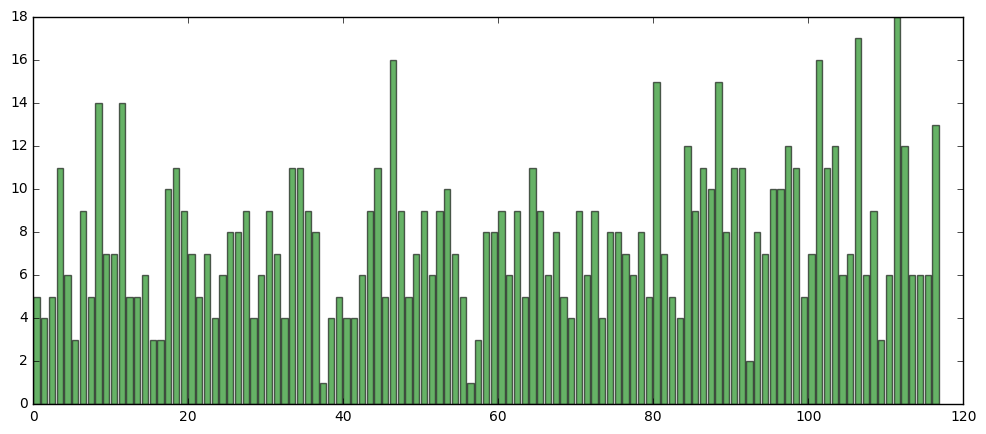

In [19]:
# bar graph showing number of peaks above threshold for each virus

threshold = 500
peaks = ([])
# for every virus accession
for i in viruses:
    
    # compute the array of IRES elements above threshold
    peaks = np.append(peaks, num_peaks(i, threshold))

plt.figure(figsize = (12,5))
plt.bar(np.arange(len(viruses)), peaks, alpha = 0.6, color = 'green')


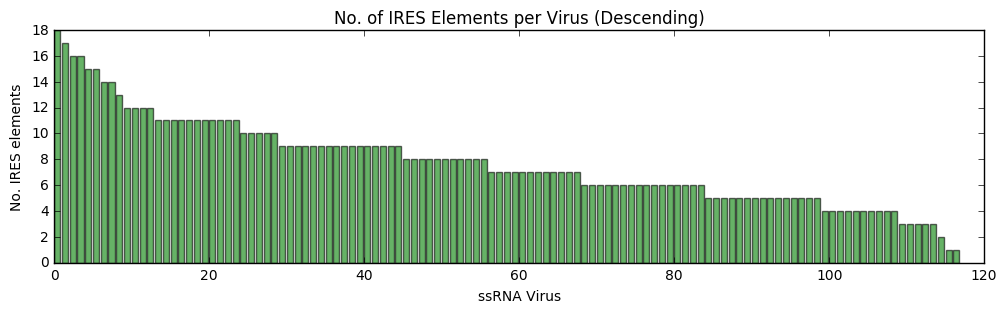

In [20]:
# bar graph showing number of peaks above threshold for each virus

threshold = 500
peaks = ([])
# for every virus accession
for i in viruses:
    
    # compute the array of IRES elements above threshold
    peaks = np.append(peaks, num_peaks(i, threshold))

descending_peaks = sorted(peaks, reverse = True)
plt.figure(figsize = (12,3))
plt.bar(np.arange(len(viruses)), descending_peaks, alpha = 0.6, color = 'green')
plt.title('No. of IRES Elements per Virus (Descending)')
plt.xlabel('ssRNA Virus')
plt.ylabel('No. IRES elements')
plt.savefig('bar.jpg')
plt.show()

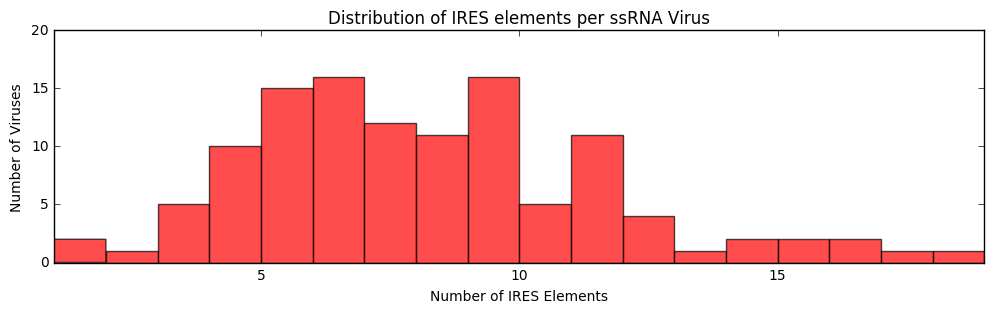

In [21]:
# histogram showing the number of viruses that contain a certain number of IRES elements above threshold

threshold = 500
peaks = ([])
# for every virus accession
for i in viruses:
    
    # compute the array of IRES elements above threshold
    peaks = np.append(peaks, num_peaks(i, threshold))

plt.figure(figsize = (12,3))
plt.hist(peaks, bins= np.arange(min(peaks), max(peaks) + 2, 1), alpha = 0.7, color = 'red')
plt.title('Distribution of IRES elements per ssRNA Virus')
plt.xlabel('Number of IRES Elements')
plt.ylabel('Number of Viruses')
plt.xlim(1,19)
plt.ylim(0,20)
plt.savefig('hist.jpg')
plt.show()

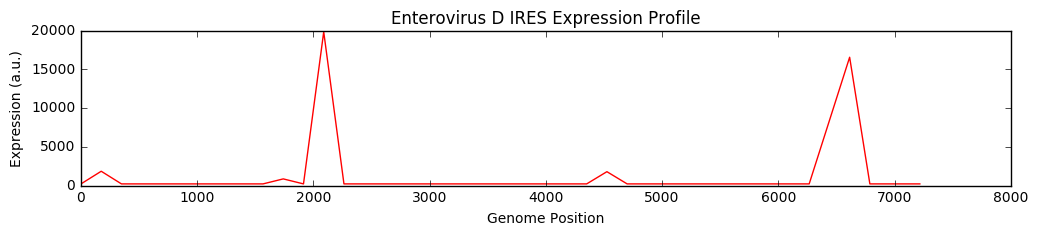

In [226]:
entero_d = data[data['Accession '].str.contains('NC_001430')]
entero_d = entero_d.fillna(206.29)

plt.figure(figsize = (12,2), dpi = 300)
plt.plot(entero_d.loc[:, 'Oligo_start_position'], entero_d.loc[:, 'eGFP_expression (a.u)'], c = 'r')
plt.title('Enterovirus D IRES Expression Profile')
plt.xlabel('Genome Position')
plt.ylabel('Expression (a.u.)')
plt.savefig('plot.jpg', bbox_inches='tight')

plt.show()

In [223]:
# Histogram of Pico and Flavi Max IRES levels

In [123]:
pico_max = []
flavi_max = []

for i in range(len(virus_class)):
    
    if virus_class[i] == 1:
        pico_max = np.append(pico_max, max_expression[i])
        
    if virus_class[i] == 2:
        flavi_max = np.append(flavi_max, max_expression[i])

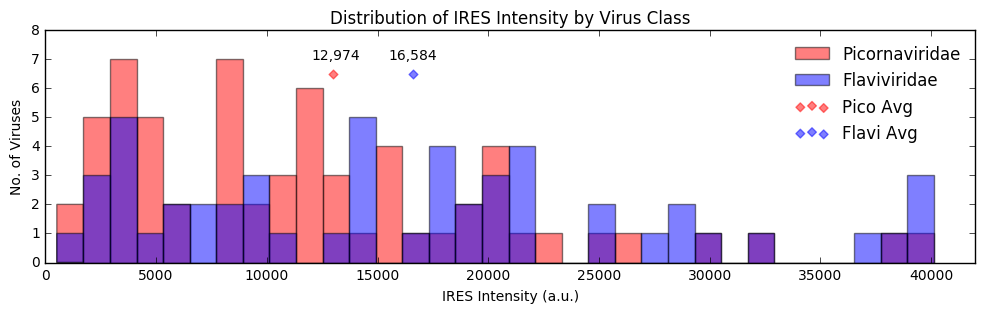

In [227]:
plt.figure(figsize = (12, 3))

# Pico Stuff
plt.hist(pico_max, bins= np.arange(min(max_expression), max(max_expression), 1200), color = 'red', alpha = 0.5,
        label = 'Picornaviridae')
plt.text(12000, 7, '12,974')


# Flavi Stuff
plt.hist(flavi_max, bins= np.arange(min(max_expression), max(max_expression), 1200), color = 'blue', alpha = 0.5,
        label = 'Flaviviridae')
plt.text(15500, 7, '16,584')

# Titles and legend
plt.title('Distribution of IRES Intensity by Virus Class')
plt.xlabel('IRES Intensity (a.u.)')
plt.ylabel('No. of Viruses')

# Pico avg
plt.scatter(12974, 6.5, color = 'red', marker = 'D', alpha = 0.5, label = 'Pico Avg')
# Falvi avg
plt.scatter(16584, 6.5, color = 'blue', marker = 'D', alpha = 0.5, label = 'Flavi Avg')

plt.legend(loc = 'upper right', frameon = False)
plt.xlim(0, 42000)
plt.ylim(0,8)
plt.savefig('intensity_hist', bbox_inches='tight')
plt.show()

In [210]:
np.mean(flavi_max)

16584.496153846154

In [109]:
viruses

array(['NC_001430', 'NC_001461', 'NC_001472', 'NC_001474', 'NC_001475',
       'NC_001477', 'NC_001490', 'NC_001563', 'NC_001564', 'NC_001612',
       'NC_001617', 'NC_001655', 'NC_001672', 'NC_001710', 'NC_001809',
       'NC_001837', 'NC_001859', 'NC_001897', 'NC_001918', 'NC_002031',
       'NC_002032', 'NC_002058', 'NC_002554', 'NC_002640', 'NC_002657',
       'NC_003077', 'NC_003635', 'NC_003675', 'NC_003676', 'NC_003678',
       'NC_003679', 'NC_003687', 'NC_003690', 'NC_003976', 'NC_003983',
       'NC_003985', 'NC_003987', 'NC_003988', 'NC_003990', 'NC_003992',
       'NC_003996', 'NC_004004', 'NC_004119', 'NC_004355', 'NC_004421',
       'NC_004441', 'NC_004451', 'NC_004915', 'NC_005039', 'NC_005062',
       'NC_006553', 'NC_006947', 'NC_007580', 'NC_008250', 'NC_008718',
       'NC_008719', 'NC_009026', 'NC_009028', 'NC_009029', 'NC_009448',
       'NC_009750', 'NC_009823', 'NC_009824', 'NC_009825', 'NC_009826',
       'NC_009827', 'NC_009887', 'NC_009891', 'NC_009996', 'NC_0

In [117]:
# Histogram of Pico and Flavi IRES counts

pico = []
flavi = []

for i in range(len(virus_class)):
    
    if virus_class[i] == 1:
        pico = np.append(pico, viruses[i])
        
    if virus_class[i] == 2:
        flavi = np.append(flavi, viruses[i])

In [129]:
#threshold
theshold = 500

virus_IRES_num = []
pico_IRES_num = []
flavi_IRES_num = []

# Virus array
for i in viruses:
    virus_IRES_num = np.append(virus_IRES_num, num_peaks(i, threshold))

# pico array
for i in pico:
    pico_IRES_num = np.append(pico_IRES_num, num_peaks(i, threshold))
    
# flavi array
for i in flavi:
    flavi_IRES_num = np.append(flavi_IRES_num, num_peaks(i, threshold))

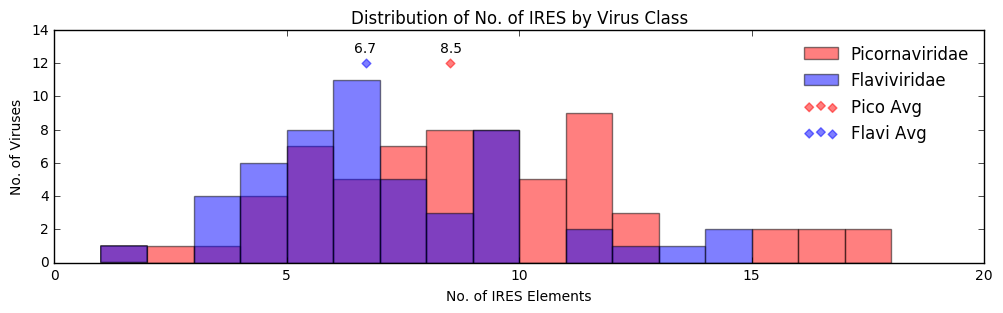

In [228]:
plt.figure(figsize = (12, 3))

# Pico Stuff 
plt.hist(pico_IRES_num, bins= np.arange(min(virus_IRES_num), max(virus_IRES_num) + 1, 1), color = 'red', alpha = 0.5,
        label = 'Picornaviridae')
plt.scatter(8.5, 12, color = 'red', marker = 'D', alpha = 0.5, label = 'Pico Avg')

# Flavi Stuff
plt.hist(flavi_IRES_num, bins= np.arange(min(virus_IRES_num), max(virus_IRES_num) + 1, 1), color = 'blue', alpha = 0.5,
        label = 'Flaviviridae')
plt.scatter(6.7, 12, color = 'blue', marker = 'D', alpha = 0.5, label = 'Flavi Avg')

# Titles and legend
plt.title('Distribution of No. of IRES by Virus Class')
plt.xlabel('No. of IRES Elements')
plt.ylabel('No. of Viruses')
plt.ylim(0,14)
plt.legend(loc = 'upper right', frameon = False)

# annotate pico avg
plt.annotate('6.7', xy = (7,14), xytext = (6.45,12.7))

# annotate flavi avg
plt.annotate('8.5', xy = (7,14), xytext = (8.3,12.7))

plt.savefig('number_hist', bbox_inches='tight')

plt.show()

In [229]:
# Notes:
# We can get more datapoints if our histograms included all the IRES elements over a threshold value,
# but make the threshold larger than 500